<a href="https://colab.research.google.com/github/MichaelBarfuss/Intro-to-Analytics/blob/main/Actual_IMSE_441_Final_Project(MB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the final project, you need to demonstrate your data analytics skills from data understanding, cleaning, descriptive statsistics, visualization and statistical analysis. Your final project should be a clean code and proper markdown. 

- Information about data:-
    >experience_level: 
    - SE: Senior level
    - MI: medium level
    - EN: Entry level
    - EX: Executive level

    >employment_type: 
    - FT(Full-Time)
    - PT(Part-Time)
    - CT(Contract)
    - FL(Freelance)
    
    >company_size: 
    - L large
    - M Medium
    - S Small

1. Import the dataset 'ds_salaries' from github and find out data types. Mention what are the categorical and numerical columns present. Perform data cleaning if needed.
2. Display the column names and # of unique values in each column. Write 2 lines to show your understanding from the unique values (you can choose for any 2 columns).
3. Drop the columns 'salary_currency','employee_residence' & 'remote_ratio' from your data set. Evaluate how many 'Analytics Engineer' are present in the dataset, mention the mean salary for this job title ? Construct a bar plot of salaries for this job profile
4. Construct a histogram of 'salary' for the entire dataset, from the graph comment on salary range for most people.
5. Create a pie plot for 'job_title' and mention the category with highest # of peeople.
6. How many people have salary > 400000 [Hint: you can use '>' sign as a condition]. Display the first 2 rows of those people
7. Do a boxplot for 'salary' in each year. Mention the median value of salary each year.
8. Use a bar/pie plot and label clearly to answer the following
  >a) What %of people have executive level of experience

  >b) What %of people are employed in Large size company

  >c) What %of people in 'USA' have part time jobs
9. Using bar plot try to visualize (label clearly )
  > a) employment_type' vs 'company_location
  
  > b)'company_size' vs 'company_location'

  >c) 'employment_type' vs 'experience_level'

10. Plot a histogram for age, check if it is a normal distribution. Create a 96% CI in 'age', perform ttesting to see if 30 is an acceptable mean value of age or not based on 96% CI. 
11. Construct a Simple Linear Regression Model (build the equation) for 'age' and 'salary' data. Find the regression coefficients, assume x = 'age' and y ='salary'. [This is a toy dataset and has no resemblance with reality]. 


In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
!pip install pingouin
import pingouin as pg
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import ttest_1samp
import scipy as scipy
from scipy import stats
from scipy.stats import norm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=ad5aa0636e13e52599bd0e98ffacca753d69f20ced5878c733222231fe003585
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


# ***1***

In [2]:

url = "https://raw.githubusercontent.com/KhmAsif/IMSE441/main/ds_salaries.csv"
df = pd.read_csv(url)
df.head(2)
 

,year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size,age
0,2023,SE,FT,Principal Data Scientist,80000,EUR,ES,100,USA,L,44
1,2023,MI,CT,ML Engineer,30000,USD,US,100,USA,S,51


In [3]:
df.dtypes

year                   int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
age                    int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                115 non-null    int64 
 1   experience_level    115 non-null    object
 2   employment_type     115 non-null    object
 3   job_title           115 non-null    object
 4   salary              115 non-null    int64 
 5   salary_currency     115 non-null    object
 6   employee_residence  115 non-null    object
 7   remote_ratio        115 non-null    int64 
 8   company_location    115 non-null    object
 9   company_size        115 non-null    object
 10  age                 115 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 10.0+ KB


# **2**

In [5]:
df.nunique()

year                   2
experience_level       4
employment_type        4
job_title             15
salary                97
salary_currency        5
employee_residence    10
remote_ratio           3
company_location       2
company_size           3
age                   35
dtype: int64

These are the number of unique values in each column. As you can see there is both 4 values in experience level and employment type.For Experience level the four are SE,MI,EN,EX.

# **3**

In [6]:
df = df.drop(['salary_currency','employee_residence', 'remote_ratio'], axis=1 )
df.head()

,year,experience_level,employment_type,job_title,salary,company_location,company_size,age
0,2023,SE,FT,Principal Data Scientist,80000,USA,L,44
1,2023,MI,CT,ML Engineer,30000,USA,S,51
2,2023,MI,CT,ML Engineer,25500,USA,S,27
3,2023,SE,FT,Data Scientist,175000,USA,M,54
4,2023,SE,FT,Data Scientist,120000,USA,M,48


In [7]:
AnalyticsEngineer=(df[df['job_title']=='Analytics Engineer'])
AnalyticsEngineer

,year,experience_level,employment_type,job_title,salary,company_location,company_size,age
23,2023,SE,FT,Analytics Engineer,230000,USA,M,29
24,2023,SE,FT,Analytics Engineer,143200,USA,M,36
103,2023,SE,FT,Analytics Engineer,152500,EUR,M,51
104,2023,SE,FT,Analytics Engineer,116450,EUR,M,26
113,2023,SE,PT,Analytics Engineer,289800,EUR,M,36
114,2023,SE,FT,Analytics Engineer,214000,USA,M,52


In [8]:
len(AnalyticsEngineer)

6

There are 6 in this dataset.

In [9]:
AnalyticsEngineer.mean()

<ipython-input-9-ae6673495525>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  AnalyticsEngineer.mean()


year        2023.000000
salary    190991.666667
age           38.333333
dtype: float64

Average Salary is 190991.66666666666


<Axes: >

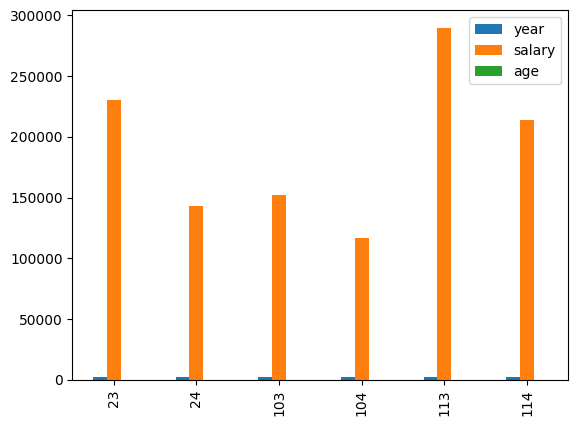

In [10]:
AnalyticsEngineer.plot(kind='bar')

# **4**

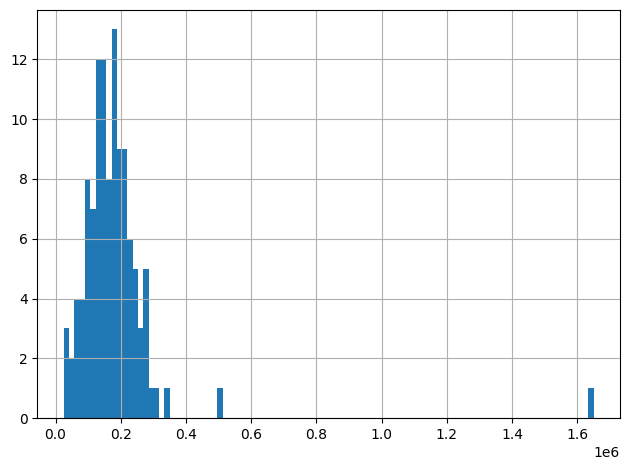

In [11]:
df['salary'].hist(bins=100)
plt.tight_layout()
plt.show()

The salary range for most people definetly fluctuates. 

# **5**

In [12]:
g=df.groupby('job_title').size()

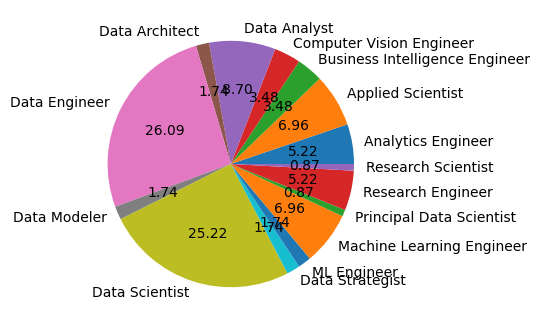

In [13]:
g.plot(kind='pie',  
       autopct='%.2f', fontsize=10, figsize=(4, 4));

Data Engineer

# **6**

In [14]:
cry=(df[df['salary']> 400000])
cry

,year,experience_level,employment_type,job_title,salary,company_location,company_size,age
39,2022,MI,FL,Machine Learning Engineer,1650000,USA,L,57
78,2023,MI,FL,Data Scientist,510000,USA,L,32


Two people have over that salary

# **7**

<Axes: title={'center': 'salary'}, xlabel='[year]'>

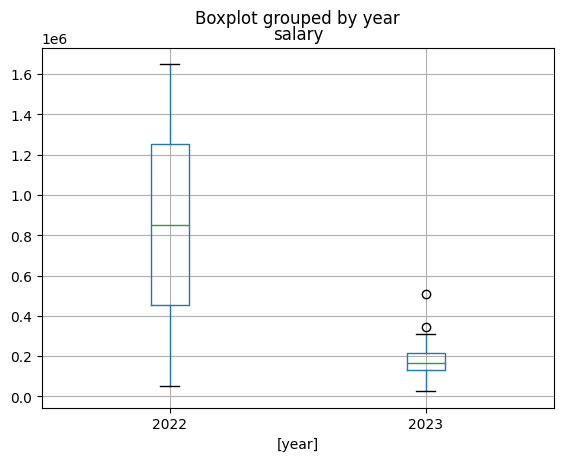

In [15]:
df.boxplot(column=['salary'], by=['year'])

# **8**

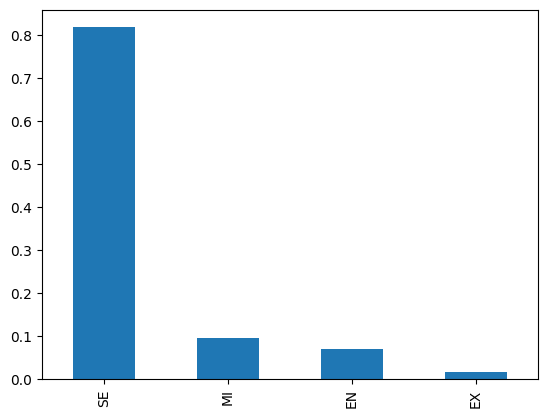

In [16]:
df['experience_level'].value_counts(normalize=True).plot(kind='bar');

Under 5 percent

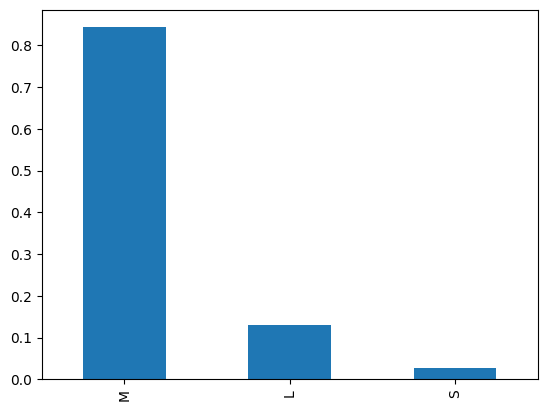

In [17]:
df['company_size'].value_counts(normalize=True).plot(kind='bar');

Looks to be about 15 percent

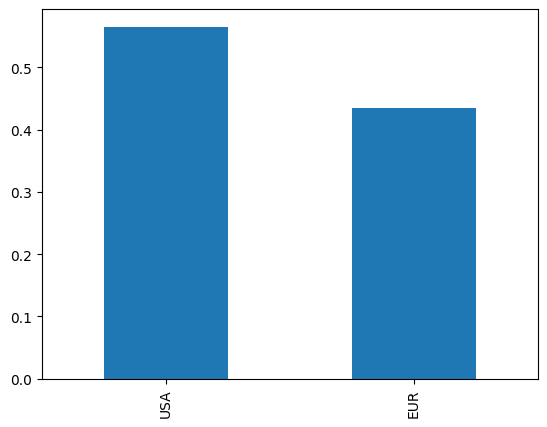

In [18]:
df['company_location'].value_counts(normalize=True).plot(kind='bar');

It looks to be about 55 percent

# **9**

<Axes: xlabel='employment_type'>

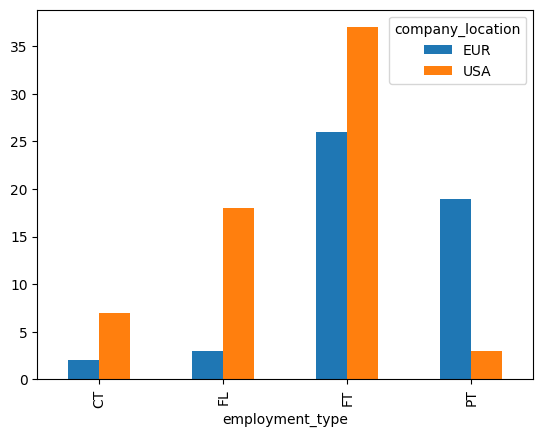

In [19]:
d= df.groupby(['employment_type','company_location']).size().unstack()
d.plot(kind = 'bar')

<Axes: xlabel='company_size'>

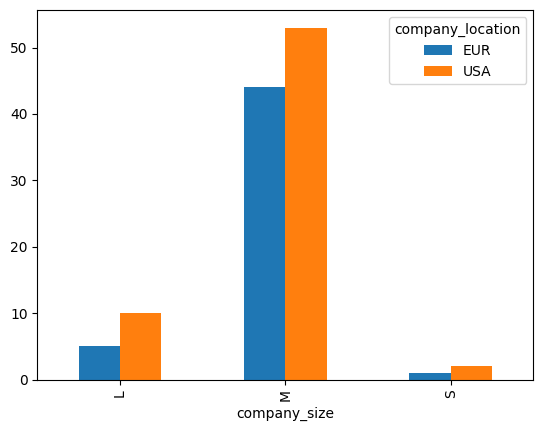

In [20]:
n= df.groupby(['company_size','company_location']).size().unstack()
n.plot(kind = 'bar')

<Axes: xlabel='employment_type'>

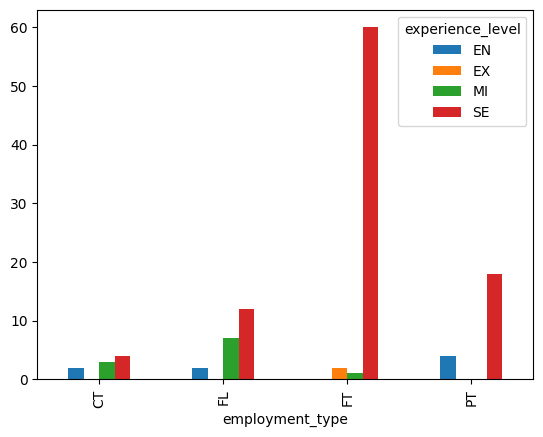

In [21]:
n= df.groupby(['employment_type','experience_level']).size().unstack()
n.plot(kind = 'bar')

# **10**

<Axes: ylabel='Frequency'>

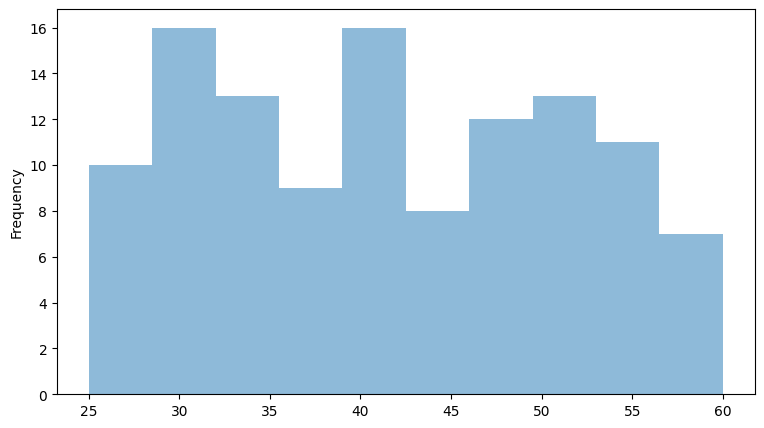

In [22]:
df['age'].plot(kind = 'hist',figsize =(9,5), alpha = 0.5)

In [23]:
age=df['age']

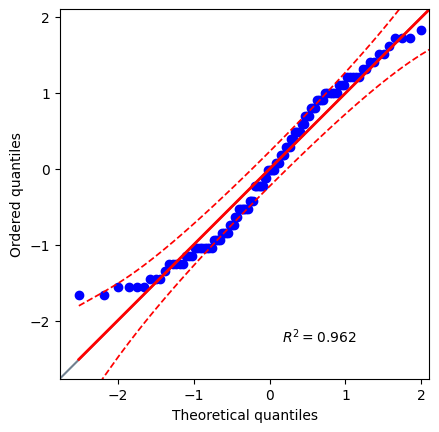

In [24]:
pg.qqplot(age)
plt.show()

In [25]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import ttest_1samp
from scipy.stats import norm

In [26]:
CI= stats.ttest_1samp(df['age'],40).confidence_interval(confidence_level=0.96)
CI

ConfidenceInterval(low=39.281757281509634, high=43.08346010979471)

In [27]:
stats.ttest_1samp(df['age'],30)


TtestResult(statistic=12.221906042968829, pvalue=1.8352675934333261e-22, df=114)

Reject null hypothesis. P value to low

# **11**

In [28]:
import sklearn.linear_model as lm

In [29]:
x=df[['age']]
y=df['salary']
x

,age
0,44
1,51
2,27
3,54
4,48
...,...
110,42
111,51
112,39
113,36


In [30]:
model = lm.LinearRegression()
model.fit(x,y)

LinearRegression()

In [31]:
print('Coefficients: ', model.coef_)
print("y-intercept ", model.intercept_)

Coefficients:  [1540.13479365]
y-intercept  118586.24015009381


y=118586.2402+1540.1348X